# Exploring the datasets created from the Data Wrangling ipynb.
 * ## Are there any factors of the ocean properties that trend well with the frequency of hurricanes?
 * ## If so, what are they and how strong of an influence do they seem to have?

In [1]:
#import packages
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

#import the csv files of the data created in the Data Wrangling step as pandas dataframes.
wod_df_loc = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/wod_df_loc.csv", 
                         index_col=[0,1], parse_dates=True)
wod_df_date = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/wod_df_date.csv", 
                          index_col = 0, parse_dates=True)
hurricanes_df = pd.read_csv("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/hurricanes_df.csv", 
                            index_col = 0, parse_dates=True)
with open("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/coast_lengths.json") as file:
    coasts_dict = json.load(file)

## First we must do Exploratory Data Analysis on the hurricanes list to get a basic feel of how many, how strong, which states, etc were impacted throughout history.
*****
### Q: How often and how many hurricanes impact the gulf coast of the United States?

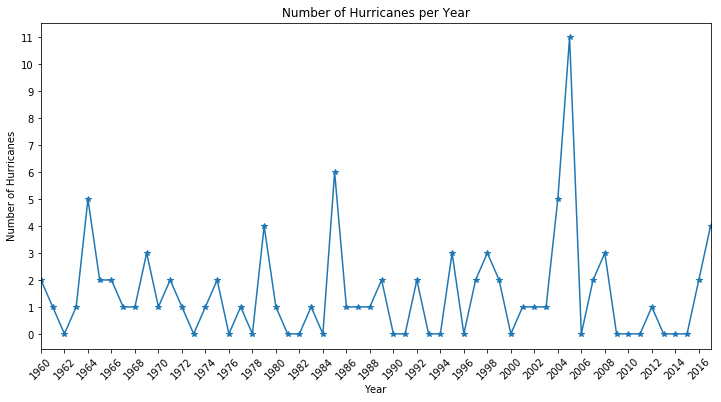

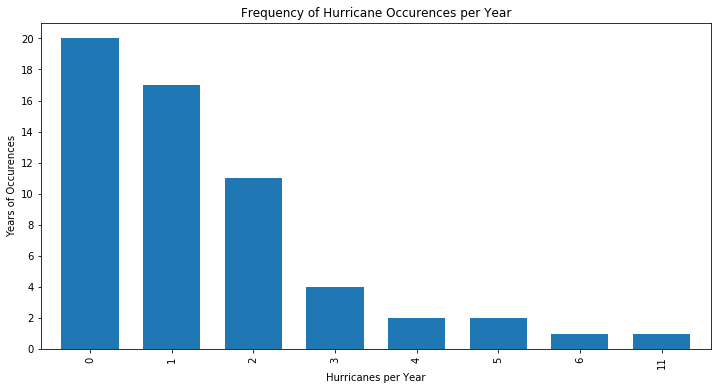

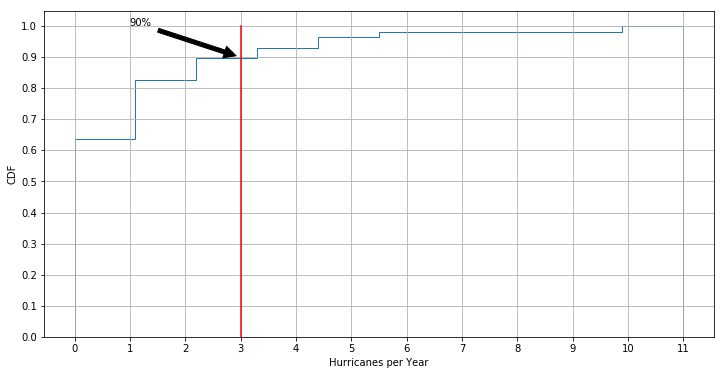

In [2]:
#group all data by year and only use the year of the date as the index
hurricanes_year = hurricanes_df.resample('A').count().name
hurricanes_year.index = hurricanes_year.index.year
hurricanes_year.plot(marker = '*', yticks = range(0,12), xticks = range(1960,2018,2), figsize=(12,6))
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes per Year')
plt.xticks(rotation=45)
plt.show()

#count frequency of hurricane occurences per year
hurricanes_year.value_counts().sort_index().plot(kind = 'bar',figsize=(12,6), width = 0.7, yticks=range(0,22,2))
plt.xlabel('Hurricanes per Year')
plt.ylabel('Years of Occurences')
plt.title('Frequency of Hurricane Occurences per Year')
plt.show()

#plot a cummulative distribution function of the frequency occurences per year.
hurricanes_year.hist(cumulative=True, normed=True, histtype='step', figsize=(12,6))
plt.plot([3,3],[0,1],color='red')
plt.ylabel('CDF')
plt.xlabel('Hurricanes per Year')
plt.xticks(range(0,12))
plt.yticks(np.arange(0,1.1,0.1))
plt.annotate('90%', xy=(3,0.9),xytext=(1,1), 
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

### A: 90% of the years had 3 hurricanes or less with most years having 0 or 1 hurricane per year.  This trend is pretty steady throughout history with a few outlying years, most notably 2005 with 11 hurricane impacts along the gulf coast.  These will be evaluated in greater detail later on below.
****
### Q: How strong are the hurricanes that impact the United States Gulf Coast, and with what frequency do the respective strengths impact the US Gulf Coast?  

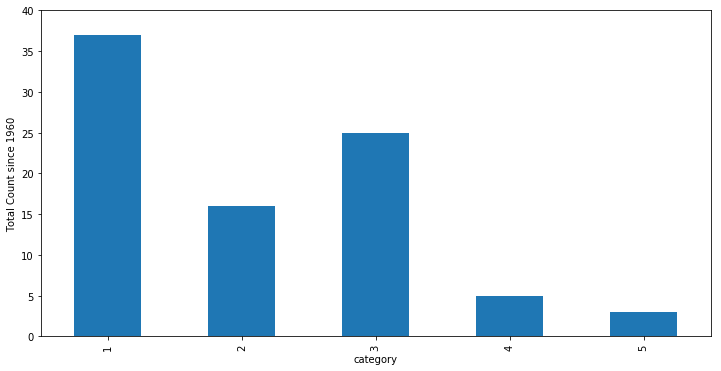

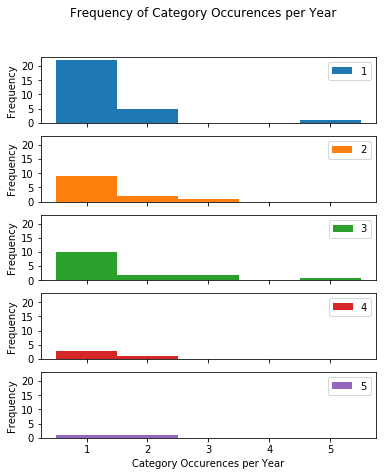

In [3]:
#look into the breakdown by hurricane category
categories = hurricanes_df.groupby('category').count()
categories.name.plot(kind='bar', figsize=(12,6), yticks=range(0,45,5))
plt.ylabel('Total Count since 1960')
plt.show()

#get a frequency per year by category plot
categories_year = pd.pivot_table(hurricanes_df,columns='category',index=hurricanes_df.index, values='state', aggfunc='count')
categories_year = categories_year.resample('A').sum()
categories_year.index = categories_year.index.year
categories_year.plot(kind='hist', bins=[1,2,3,4,5,6], align = 'left',
             figsize=(6,7),yticks=range(0,25,5), sharey=True, sharex=True, 
             subplots=True,title='Frequency of Category Occurences per Year')
plt.xlabel('Category Occurences per Year')
plt.show()

### A: After reviewing the category data, it shows that the most frequent category is Category 1 and the least frequent is Category 5.  Moreover, the most frequent occurence is for the Gulf Coast to have 1 Category 1 hurricane per year.
***
### Q: Which states are impacted most and least often by hurricanes?

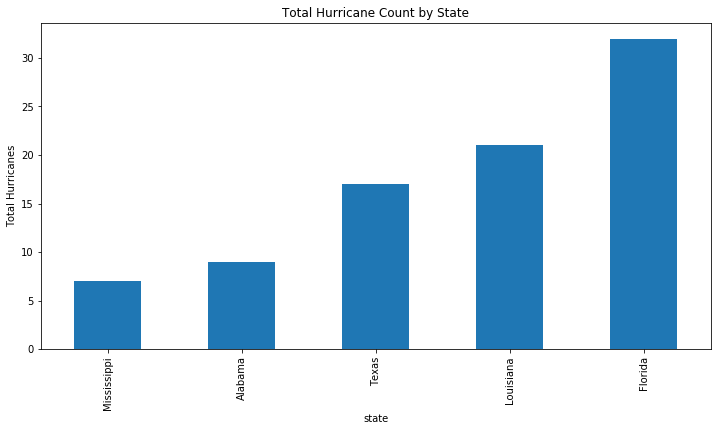

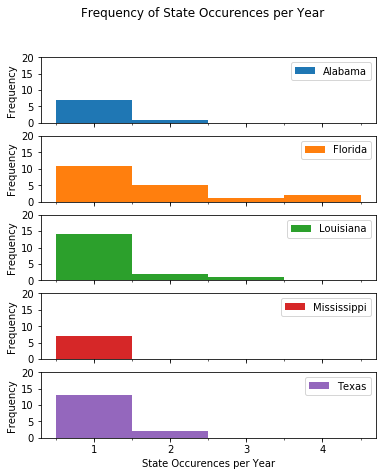

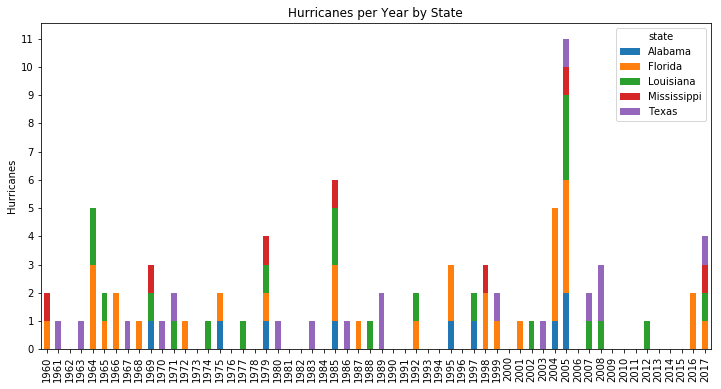

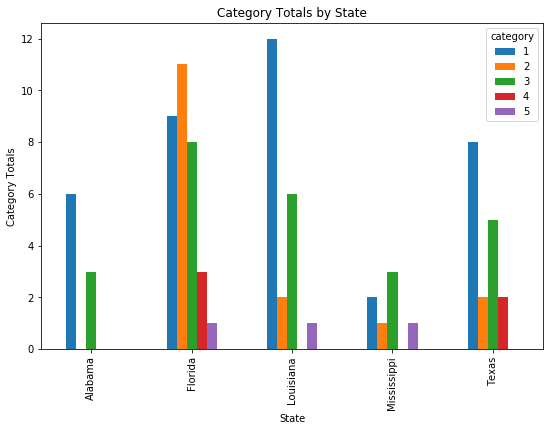

In [4]:
#now, looking at the hurricanes by state data
states = hurricanes_df.groupby('state').count().category.sort_values()
states.name = 'hurricanes'
states.plot(kind='bar', figsize=(12,6))
plt.ylabel('Total Hurricanes')
plt.title('Total Hurricane Count by State')
plt.show()

#get a frequency per year by state plot
states_year = pd.pivot_table(hurricanes_df,columns='state',index=hurricanes_df.index, 
                             values='category', aggfunc='count', fill_value=0)
states_year = states_year.resample('A').sum()
states_year.index = states_year.index.year
states_year.plot(kind='hist', bins=[1,2,3,4,5], align = 'left',
             figsize=(6,7),yticks=range(0,25,5), sharey=True, sharex=True, xticks=range(1,5), 
             subplots=True,title='Frequency of State Occurences per Year')
plt.xlabel('State Occurences per Year')
plt.show()

#get a time series look for each state
states_year.plot(kind='bar', stacked=True, figsize=(12,6), yticks=range(0,12,1))
plt.ylabel('Hurricanes')
plt.title('Hurricanes per Year by State')
plt.show()

#look at categories per state for all time
states_cat = pd.pivot_table(hurricanes_df,index='state',columns='category',values='name',aggfunc='count')
states_cat.plot(kind='bar', figsize=(9,6),yticks=range(0,14,2))
plt.xlabel('State')
plt.ylabel('Category Totals')
plt.title('Category Totals by State')
plt.show()

### A: After review of cursory hurricanes by state data, it seems Florida and Louisiana are impacted the most with Alabama and Mississippi impacted the least.  Florida is impacted by higher strength storms compared to the rest of the states, which are mostly affected by category 1 storms.  Different factors such as the sea conditions and coast line length will be compared against these statistics below.
***
### Q: What trend or impact does coast length have on number of hurricane impacts per year?

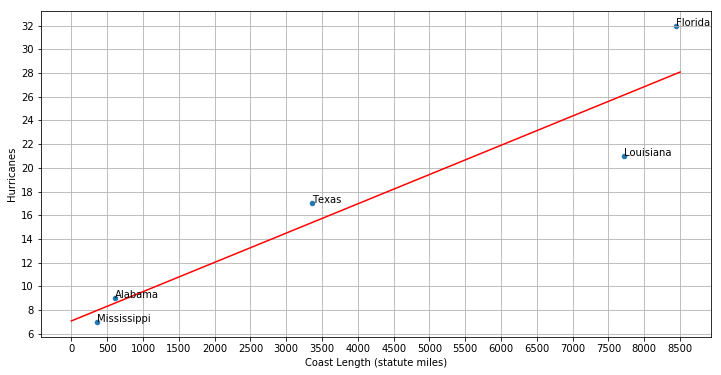

The correlation between coast length and number of hurricanes: 0.9402222593630062


In [5]:
#look at hurricane impacts of state vs. state coast length
states_df = pd.DataFrame(states)
coasts_df = pd.DataFrame.from_dict(coasts_dict, orient='index')
coasts_df.columns = ['coast_length']
states_coasts = states_df.merge(coasts_df, left_index=True, right_index=True)
states_coasts.plot(kind='scatter', x='coast_length',y='hurricanes', figsize=(12,6),
                   grid=True, yticks=range(0,36,2),xticks=range(0,9000,500))
plt.xlabel('Coast Length (statute miles)')
plt.ylabel('Hurricanes')

#annotate plots with state label
for index,row in states_coasts.iterrows():
    plt.annotate(index, xy=(row['coast_length'],row['hurricanes']))


#linear fit to the scatter plot
a, b = np.polyfit(states_coasts['coast_length'], states_coasts['hurricanes'],1)
x = np.arange(0,9000,500)
plt.plot(x,x*a+b, color ='red')

plt.show()

#print the pearson correlation value
print("The correlation between coast length and number of hurricanes: {}".format(
    np.corrcoef(states_coasts['coast_length'],states_coasts['hurricanes'])[0][1]))

### A: After looking into hurricane counts vs. coast length for each state it seems that their is a positive correlation between the two quantities.  This suggest that states with larger coast lines tend to be hit more often than states with smaller coast lines.  This may just be circumstantial to other factors such as sea temperature, sea floor depth, etc. along those coast lines.
***
## Now we need to look into the ocean data.
***
### Q: What are the trends in the main gulf features over time (temperature, oxygen, phosphates, salinity, and silicates)?

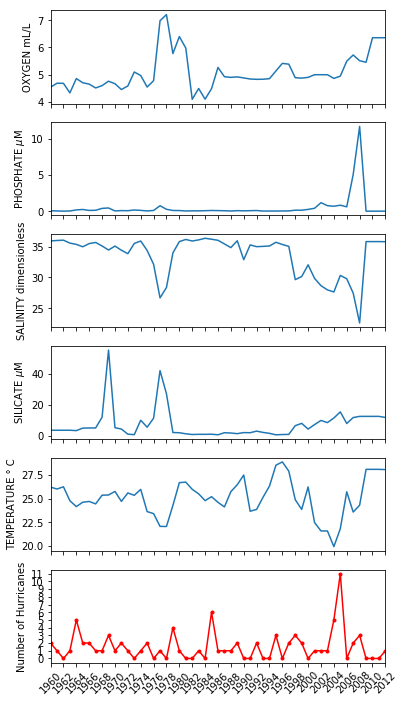

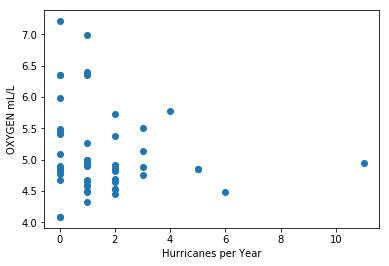

The correlation between hurricanes per year and oxygen is: -0.1391006136081913


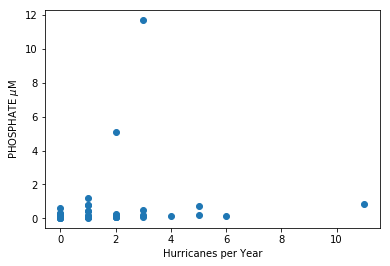

The correlation between hurricanes per year and phosphate is: 0.16118402038860266


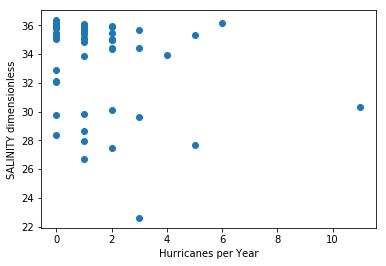

The correlation between hurricanes per year and salinity is: -0.21484617425441077


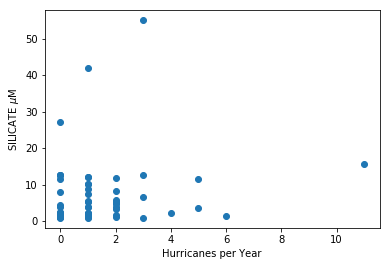

The correlation between hurricanes per year and silicate is: 0.1221824658491569


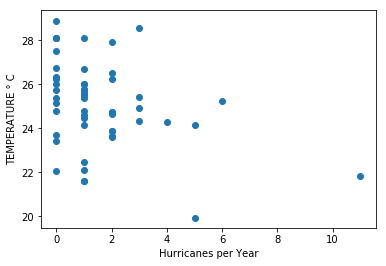

The correlation between hurricanes per year and temperature is: -0.36268359124710625


,Ocean Parameter,Correlation with Hurricance Totals
0,oxygen,-0.139101
1,phosphate,0.161184
2,salinity,-0.214846
3,silicate,0.122182
4,temperature,-0.362684


In [6]:
#yearly time trends for the ocean data
wod_df_year = wod_df_date.resample('A').mean()
wod_df_year.index = wod_df_year.index.year

#create a dictionary for ylabels
units = {wod_df_year.columns.values[0]:'mL/L', wod_df_year.columns.values[1]:r'$\mu$'+'M', 
         wod_df_year.columns.values[2]:'dimensionless', wod_df_year.columns.values[3]:r'$\mu$'+'M', 
         wod_df_year.columns.values[4]:'\N{DEGREE SIGN} C'}

f = plt.figure(figsize=(6,12))
for index, column in enumerate(wod_df_year.columns.values):
    plt.subplot(6,1,index+1)
    wod_df_year[column].plot(xticks=range(1960,2014,2))
    plt.tick_params(labelbottom='off')
    plt.ylabel(column.upper() + ' ' + units[column])
    plt.xlabel(' ')
     
plt.subplot(6,1,6)
hurricanes_year[hurricanes_year.index <=2012].plot(marker = '.', yticks = range(0,12), 
                                                       xticks = range(1960,2014,2), color='r')
plt.ylabel('Number of Hurricanes')
plt.xticks(rotation = 45)
plt.savefig("C:/Users/sethh/OneDrive/Desktop/Springboard/Capstone Project 1/ocean_params_time.png")

plt.show()
    
#scatter plots of the ocean yearl data vs. hurricanes per year data and a heatmap
corr_array = np.empty(5)

for index, column in enumerate(wod_df_year.columns.values):
    plt.scatter(x=hurricanes_year[hurricanes_year.index <=2012].values,y=wod_df_year[column].values)
    plt.xlabel('Hurricanes per Year')
    plt.ylabel(column.upper()+ ' ' + units[column])
    plt.show()
    print("The correlation between hurricanes per year and {} is: {}".format(
        column, np.corrcoef(x=hurricanes_year[hurricanes_year.index <= 2012].values,y=wod_df_year[column].values)[0][1]))
    corr_array[index] = np.corrcoef(x=hurricanes_year[hurricanes_year.index <= 2012].values,y=wod_df_year[column].values)[0][1]
    
pd.DataFrame(list(zip(wod_df_year.columns.values,corr_array)),columns=['Ocean Parameter','Correlation with Hurricance Totals'])


### A: It seems that most of the features have remained relatively steady besides temperature.  There have been upsets in all the factors.  Most interesting is that the average temperature for the gulf was much lower the year of 2005, the year of 11 hurricanes impact.  All the features have low correlations with the ocean data with temperature being the strongest.
***
### Q: Are there any correlations between the ocean features?

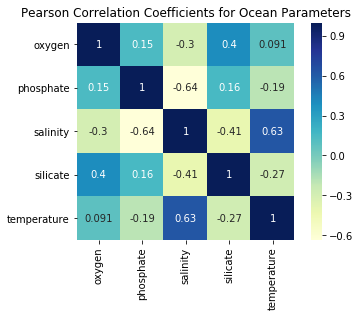

In [7]:
#see if there are any noticeable correlations between the ocean features.
sns.heatmap(wod_df_year.corr(),square=True,cmap='YlGnBu', annot=True)
plt.title('Pearson Correlation Coefficients for Ocean Parameters')
plt.show()

### A: There is a fair amount of positive correlation between salinity and temperature, and silicates and oxygen.  There seems to also be some negative correlation between silicates and temperature and salinity and oxygen, and phosphates and salinity.
***
### Q: How do the ocean properties change over time by location?

In [11]:
#set up dictionary for state locations stored as lat min, lat max, lon min, lon max
state_locs = {'Louisiana': np.array([28,30,-94,-89]), 'Alabama': np.array([29,30,-88,-87]),
              'Missippi':np.array([29,30,-89,-88]), 'Texas': np.array([26,30,-97,-94]), 'Florida': np.array([25,30,-87,-80])}

#dissassociate location into lat and lon
wod_loc_split = wod_df_loc
for index, row in wod_loc_split.iterrows():
    lat, lon = index[0].split(',')
    lat = float(lat.replace('(','').strip())
    lon = float(lon.replace(')','').strip())
    
    #add lat an lon as columns to each row in wod_df_loc
    row['lat']=lat
    row['lon']=lon
    
#now drop the location from the multi index
wod_df_loc_drop = wod_loc_split
wod_df_loc_drop.index = wod_df_loc_drop.index.droplevel()
wod_df_loc_drop.sort_index(inplace=True)

#create state dfs from the wod_df_loc dataframe
states = {}
for key, arr in state_locs.items():
    print(arr)
    states[key] = wod_df_loc_drop[(wod_df_loc_drop.lat.values >= arr[0]) & 
                                (wod_df_loc_drop.lat.values <= arr[1]) & 
                                (wod_df_loc_drop.lon.values >= arr[2]) & 
                                (wod_df_loc_drop.lon.values <= arr[3])]   




[ 28  30 -94 -89]
[ 29  30 -88 -87]
[ 29  30 -89 -88]
[ 26  30 -97 -94]
[ 25  30 -87 -80]


In [13]:
#breaking it down by state coast averages to look closer at the feature trends instead of treating the gulf one big average.


,oxygen,phosphate,salinity,silicate,temperature,lat,lon
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,5.144575,0.222844,33.708386,2.541594,24.287101,29.442149,-87.595041
std,0.491560,0.186970,3.142292,1.249146,4.054804,0.497671,0.491901
min,2.240000,0.010000,16.500000,0.300000,15.321429,29.000000,-88.000000
25%,4.891302,0.083053,32.701426,2.062202,21.375000,29.000000,-88.000000
50%,4.939561,0.298125,34.604118,2.493929,24.440725,29.000000,-88.000000
75%,5.618500,0.333298,35.828063,3.041462,28.127500,30.000000,-87.000000
max,7.700000,1.390000,37.700000,14.110000,30.800000,30.000000,-87.000000
